In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('C:/USERS/YASHN/ratings_review_data.CSV')
df

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Perfect product!,One of the best Laptop in the market for home ...,5
1,1,Just wow!,Excellent & far far better than HP laptops. Ve...,5
2,2,Simply awesome,Best budget laptop if u are student then this ...,5
3,3,Mind-blowing purchase,Lapt lennovo is very good excellent product he...,5
4,4,Very Good,"I had purchased this product 3 weeks ago, firs...",4
...,...,...,...,...
25906,25906,Pretty good,Writing this review after 45 days of use.\n.\n...,4
25907,25907,Awesome,The best product ever in that range prize very...,5
25908,25908,Wonderful,Great watch in budget track step quite good in...,5
25909,25909,Terrific,The best smartwatch available right now with a...,5


In [3]:
#Merging feature Review Titles and Review Descriptions to Review Titles
df['review_text'] = df['Review_title'].apply(lambda x: str(x)+" ") + df['Review_text']

#Rename column Ratings to rating
df.rename(columns={'Ratings':'rating'},inplace=True)

#Dropping feature Review Titles and Review Descriptions as these are already merged into review_text
df.drop(columns=['Review_title','Review_text'],inplace=True)

#interpreting first 5 rows of new dataset
df.head()

,Unnamed: 0,rating,review_text
0,0,5,Perfect product! One of the best Laptop in the...
1,1,5,Just wow! Excellent & far far better than HP l...
2,2,5,Simply awesome Best budget laptop if u are stu...
3,3,5,Mind-blowing purchase Lapt lennovo is very goo...
4,4,4,Very Good I had purchased this product 3 weeks...


In [4]:
#checking general informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25911 entries, 0 to 25910
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   25911 non-null  int64 
 1   rating       25911 non-null  int64 
 2   review_text  25911 non-null  object
dtypes: int64(2), object(1)
memory usage: 607.4+ KB


In [5]:
#checking null values
df.isnull().sum()

Unnamed: 0     0
rating         0
review_text    0
dtype: int64

<AxesSubplot:>

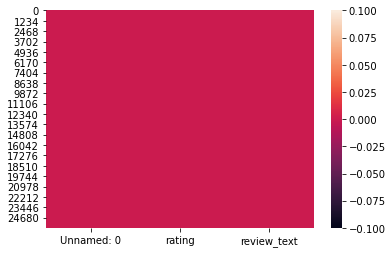

In [6]:
# plotting heatmap
sns.heatmap(df.isnull())

In [7]:
#converting all the review_text to lowercase
df.review_text = df.review_text.str.lower()

#interpreting first 5 rows
df.head()

,Unnamed: 0,rating,review_text
0,0,5,perfect product! one of the best laptop in the...
1,1,5,just wow! excellent & far far better than hp l...
2,2,5,simply awesome best budget laptop if u are stu...
3,3,5,mind-blowing purchase lapt lennovo is very goo...
4,4,4,very good i had purchased this product 3 weeks...


In [8]:
# Dropping the column 'Unnamed: 0' since this is of no use

df = df.drop(['Unnamed: 0'], axis=1)

df

,rating,review_text
0,5,perfect product! one of the best laptop in the...
1,5,just wow! excellent & far far better than hp l...
2,5,simply awesome best budget laptop if u are stu...
3,5,mind-blowing purchase lapt lennovo is very goo...
4,4,very good i had purchased this product 3 weeks...
...,...,...
25906,4,pretty good writing this review after 45 days ...
25907,5,awesome the best product ever in that range pr...
25908,5,wonderful great watch in budget track step qui...
25909,5,terrific the best smartwatch available right n...


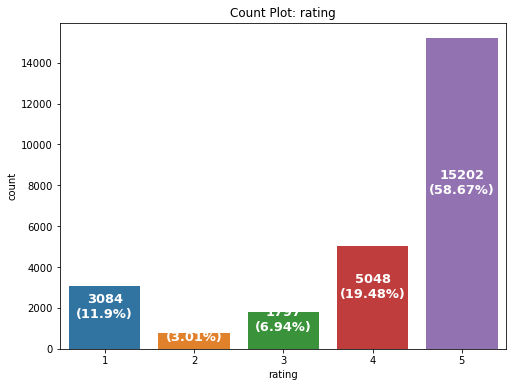

In [9]:
#checking feature rating using count plot
x = 'rating'
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

In [10]:
#adding a new column length for review text length
df['length'] = df.review_text.str.len()

#interpreting first 5 rows
df.head()

,rating,review_text,length
0,5,perfect product! one of the best laptop in the...,332
1,5,just wow! excellent & far far better than hp l...,295
2,5,simply awesome best budget laptop if u are stu...,237
3,5,mind-blowing purchase lapt lennovo is very goo...,345
4,4,very good i had purchased this product 3 weeks...,332


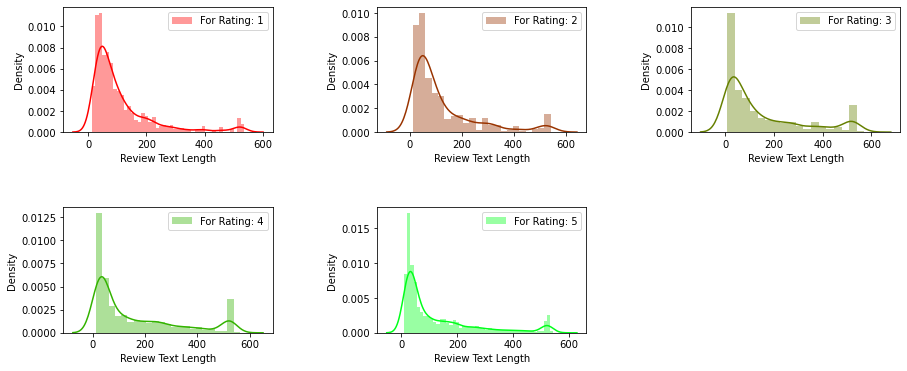

In [11]:
#checking review text length distribution for each rating
ratings = np.sort(df.rating.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.length[df.rating==i],ax=axis,label=f"For Rating: {i}",color=colors[i-1])
    axis.set_xlabel(f"Review Text Length")
    axis.legend()
    p += 1
    
plt.show()

In [12]:
# Replace money sysmbols with 'dollars' Euro symbol: Alt + 156
df.review_text = df.review_text.str.replace(r'₹|\£|\$','dollars')

# Replace number with 'numbr'
df.review_text = df.review_text.str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
df.review_text = df.review_text.str.replace(r'[^\w\d\s]',' ')

# Replace white space between term with single space
df.review_text = df.review_text.str.replace(r'\s+',' ')

# Remove leading and trailing whitespaces
df.review_text = df.review_text.str.replace(r'^\s+|\s+?$','')

In [13]:
df.head()

,rating,review_text,length
0,5,perfect product one of the best laptop in the ...,332
1,5,just wow excellent far far better than hp lapt...,295
2,5,simply awesome best budget laptop if u are stu...,237
3,5,mind blowing purchase lapt lennovo is very goo...,345
4,4,very good i had purchased this product numbr w...,332


In [14]:
# Removing Stop wards
#setting stop words
stop_words = set(stopwords.words('english') + ['u','ur','ure','im','gd','dont','doin'])

#removing stop words
df.review_text = df.review_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [15]:
#Adding new column clean_length for review_text length after cleaning
df['clean_length'] = df.review_text.str.len()

#Interpreting first 5 rows
df.head()

,rating,review_text,length,clean_length
0,5,perfect product one best laptop market home us...,332,242
1,5,wow excellent far far better hp laptops fast l...,295,242
2,5,simply awesome best budget laptop student lapt...,237,161
3,5,mind blowing purchase lapt lennovo good excell...,345,293
4,4,good purchased product numbr weeks ago first t...,332,233


In [16]:
#Checking the difference between original review text length and cleaned length
print(f"Orignal Review Text Length: {df.length.sum()}")
print(f"Cleaned Review Text Length: {df.clean_length.sum()}")
print(f"Difference: {df.length.sum() - df.clean_length.sum()}")

Orignal Review Text Length: 3404487
Cleaned Review Text Length: 2503084
Difference: 901403


Review text length reduced by greater length after removal of stop words and punctuations.

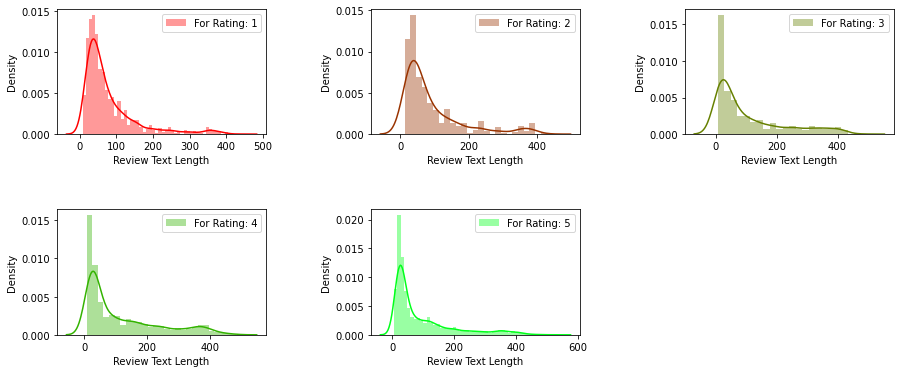

In [17]:
#checking review text length distribution for each rating after cleaning
ratings = np.sort(df.rating.unique())
cols = 3
rows = len(ratings)//cols
if len(ratings) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.clean_length[df.rating==i],ax=axis,label=f"For Rating: {i}",color=colors[i-1])
    axis.set_xlabel(f"Review Text Length")
    axis.legend()
    p += 1

plt.show()

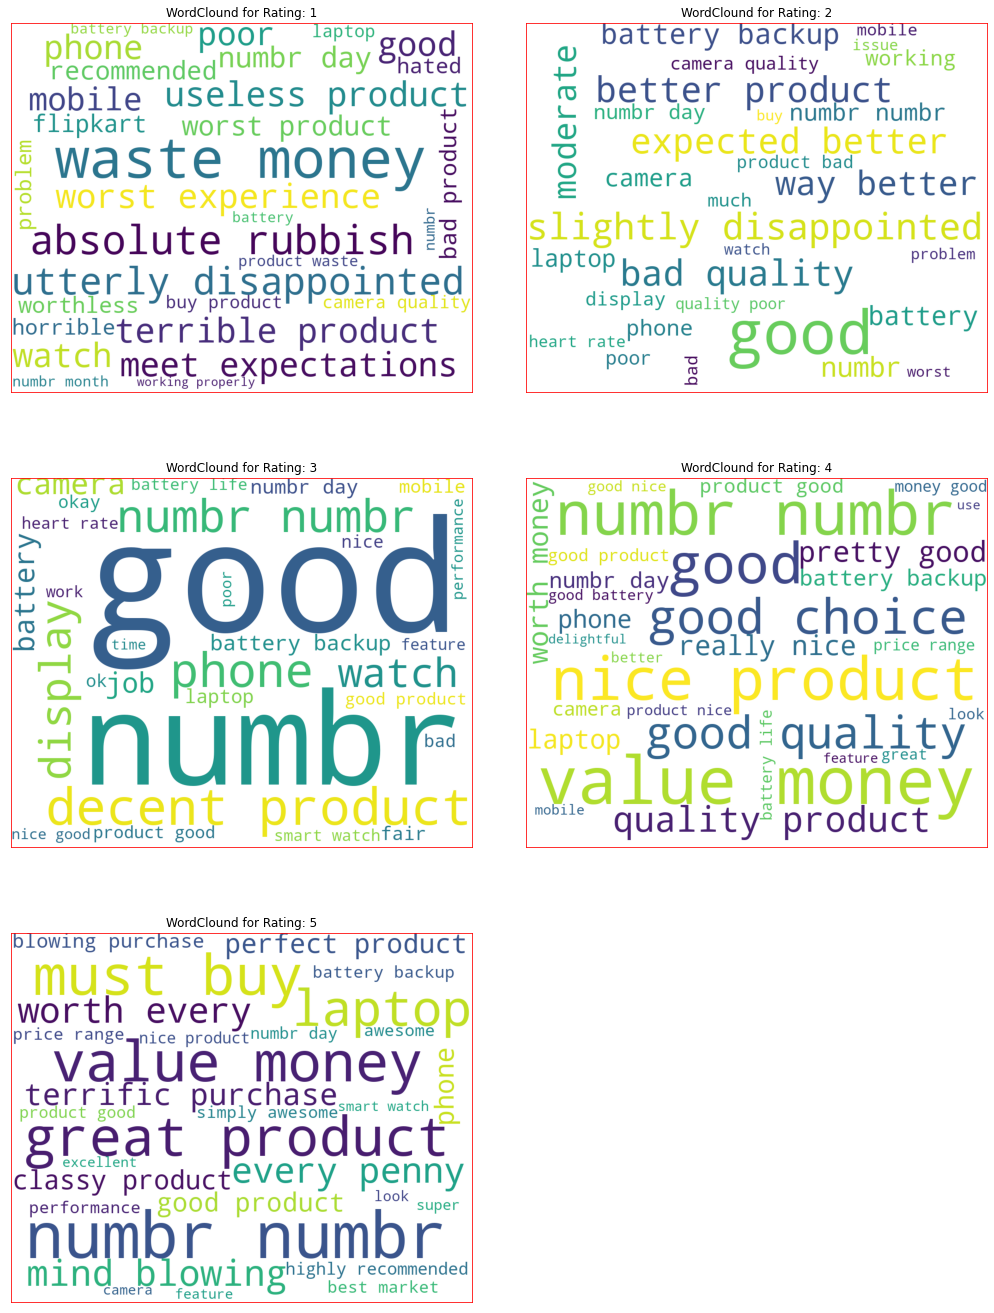

In [18]:
# Word Cloud
# getting sense of loud word in each rating
from wordcloud import WordCloud
cols = 2
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white",max_words=30).generate(' '.join(df.review_text[df.rating==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordClound for Rating: {i}")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1
    
plt.show()

In [19]:
#converting text into vectors using TF-IDF
tfidf = TfidfVectorizer()

#vectorizing text features
features = tfidf.fit_transform(df.review_text)

In [20]:
#Input Variable
X = features

#Output Variable
Y = df.rating

In [21]:
# Creating train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=85,test_size=.25)

In [22]:
# Creating empty list

Model = []
score = []
cv_score = []

In [23]:
LR=LogisticRegression()
Model.append('LogisticRegression')
LR.fit(x_train,y_train)
print(LR)
pre=LR.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(LR,X,Y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)

LogisticRegression()


Accuracy_score=  0.9357826489657302
Cross_val_score= 0.9014326443372862 



In [24]:
KNN=KNeighborsClassifier(n_neighbors=6)

Model.append('KNeighborsClassifier')
KNN.fit(x_train,y_train)
print(KNN)

pre=KNN.predict(x_test)
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)

score.append(AS*100)
sc=cross_val_score(KNN,X,Y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc)
cv_score.append(sc*100)


KNeighborsClassifier(n_neighbors=6)
Accuracy_score=  0.8817536276628589
Cross_val_score= 0.8150212824293535


In [25]:
DT=DecisionTreeClassifier()
Model.append('DecisionTreeClassifier')
DT.fit(x_train,y_train)
print(DT)
pre=DT.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DT,X,Y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)

DecisionTreeClassifier()


Accuracy_score=  0.9501389317690645
Cross_val_score= 0.8708286888979521 



In [26]:
RF = RandomForestClassifier()
Model.append('RandomForestClassifier')
RF.fit(x_train,y_train)
print(RF)
pre=RF.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(RF,X,Y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')

cv_score.append(sc*100)

RandomForestClassifier()


Accuracy_score=  0.9646495832046929
Cross_val_score= 0.9164841222674281 



In [27]:
#Calculating the difference between accuracy score and cross validation score
difference = list(np.array(score) - np.array(cv_score))

# Creating dataframe
result = pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv_score,
                       'Difference':difference})
result

,Model,Accuracy_score,Cross_val_score,Difference
0,LogisticRegression,93.578265,90.143264,3.435000
1,KNeighborsClassifier,88.175363,81.502128,6.673235
2,DecisionTreeClassifier,95.013893,87.082869,7.931024
3,RandomForestClassifier,96.464958,91.648412,4.816546


In [31]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(RF, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.953 total time=  10.0s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.956 total time=   9.9s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.957 total time=  10.0s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.952 total time=  20.0s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.956 total time=  19.7s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.957 total time=  20.1s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.953 total time=   9.9s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.953 total time=   9.9s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [32]:
GSCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 800,
 'n_estimators': 200}

In [34]:
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 96.40321086755172

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       778
           2       0.99      0.85      0.92       212
           3       0.97      0.84      0.90       447
           4       0.95      0.92      0.93      1295
           5       0.96      0.99      0.98      3746

    accuracy                           0.96      6478
   macro avg       0.97      0.92      0.94      6478
weighted avg       0.96      0.96      0.96      6478


CONFUSION MATRIX: 
 [[ 775    1    0    0    2]
 [  12  181    0   13    6]
 [   7    0  376   26   38]
 [   0    0   11 1191   93]
 [   0    0    0   24 3722]]


In [38]:
# Saving the final model
import joblib
filename = 'ratings_review_project.pkl'
joblib.dump(best_model, open(filename, 'wb'))